<a href="https://colab.research.google.com/github/benjaminutter/IDS/blob/Project4/Problem2P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data from GitHub

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# url of csv
data_url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv"

# put into df
df = pd.read_csv(data_url)

Sorting by saturated fat and showing the top 5 highest

In [ ]:
# sort df by saturated fat in descending order
sorted_df = df.sort_values(by='saturated_fat', ascending=False)

# get top 5
top_5_saturated_fat = sorted_df.head(5)

# print top 5
print(top_5_saturated_fat[['food item', 'saturated_fat']])


                                  food item  saturated_fat
378  CHEESECAKE                    1 CAKE            119.9
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL           118.3
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             92.0
581  CREME PIE                     1 PIE              90.1
890  LARD                          1 CUP              80.4


The validity of this top 5 may be a little off because of the fact that the measurements of these foods are different. Instead, we should have measured the amount of saturated fat divided by a standard unit.

Saturated fat per gram data frame and showing the top 5 foods of this category


In [ ]:
# new df sfat per gram
df['sfat_per_g'] = df['saturated_fat'] / df['weight_in_grams']

# sorting in descending order
sorted_df = df.sort_values(by='sfat_per_g', ascending=False)

# getting  top 5
top5_sfat_perg = sorted_df.head(5)

# Print the top 5 food items
print(top5_sfat_perg[['food item', 'sfat_per_g']])


                                  food item  sfat_per_g
908  BUTTER; SALTED                1 TBSP      0.507143
909  BUTTER; UNSALTED              1 TBSP      0.507143
710  BUTTER; UNSALTED              1/2 CUP     0.505310
709  BUTTER; SALTED                1/2 CUP     0.505310
913  BUTTER; UNSALTED              1 PAT       0.500000


Standardizing saturated fat per gram and showing the outliers.

High-end outliers (food items):
                                  food item  sfat_per_g
210  CHOCOLATE; BITTER OT BAKING   1 OZ        0.317460
448  COCONUT; RAW; SHREDDED        1 CUP       0.297500
492  COCONUT; DRIED; SWEETND;SHREDD1 CUP       0.315054
576  COCONUT; RAW; PIECE           1 PIECE     0.297778
709  BUTTER; SALTED                1/2 CUP     0.505310
710  BUTTER; UNSALTED              1/2 CUP     0.505310
890  LARD                          1 CUP       0.392195
898  FATS; COOKING/VEGETBL SHORTENG1 TBSP      0.253846
899  LARD                          1 TBSP      0.392308
907  FATS; COOKING/VEGETBL SHORTENG1 CUP       0.250244
908  BUTTER; SALTED                1 TBSP      0.507143
909  BUTTER; UNSALTED              1 TBSP      0.507143
912  BUTTER; SALTED                1 PAT       0.500000
913  BUTTER; UNSALTED              1 PAT       0.500000
920  IMITATION CREAMERS; POWDERED  1 TSP       0.350000

Number of low-end outliers: 0



<ipython-input-15-66108b0bf881>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sfat_per_g'], shade=True)


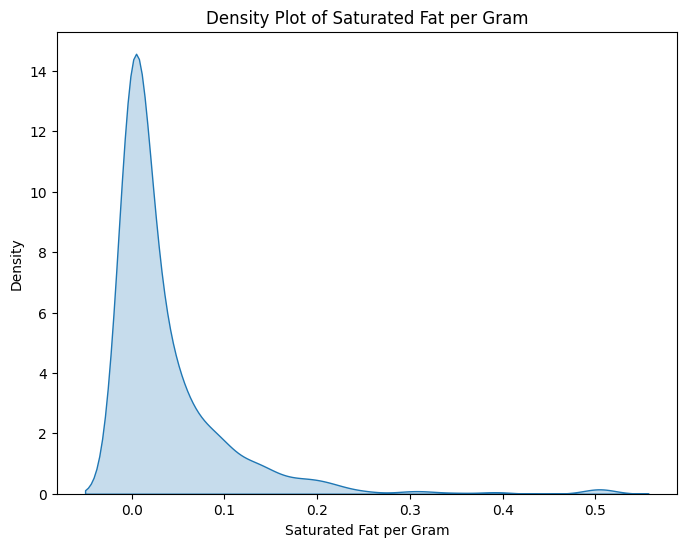

In [ ]:
import seaborn as sns

# standardizing sfat_per_g
mean_sfat_per_g = df['sfat_per_g'].mean()
stddev_sfat_per_g = df['sfat_per_g'].std()
df['standardized_saturated_fat_per_gram'] = (df['sfat_per_g'] - mean_sfat_per_g) / stddev_sfat_per_g

# std dev threshold
threshold = 3

# high outliers
high_outliers = df[df['standardized_saturated_fat_per_gram'] > threshold]

# low outliers
low_outliers = df[df['standardized_saturated_fat_per_gram'] < -threshold]

# print outliers
print("High-end outliers (food items):")
print(high_outliers[['food item', 'sfat_per_g']])

# counting low end
low_count = len(low_outliers)
print(f"\nNumber of low-end outliers: {low_count}\n")

# density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['sfat_per_g'], shade=True)
plt.xlabel('Saturated Fat per Gram')
plt.ylabel('Density')
plt.title('Density Plot of Saturated Fat per Gram')
plt.show()
